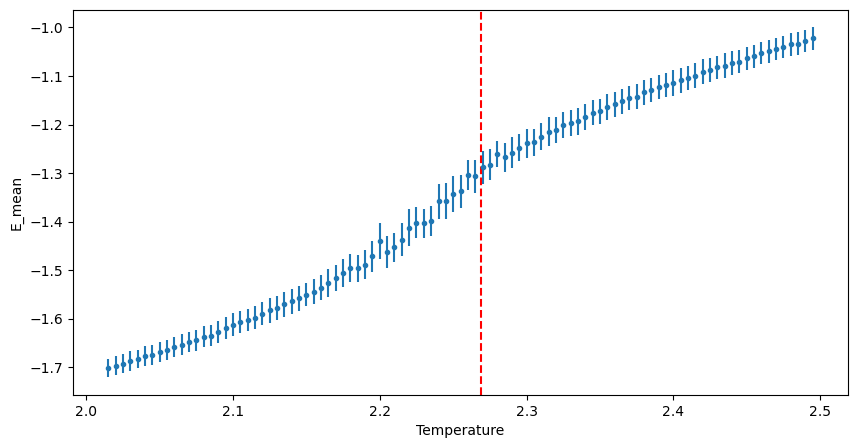

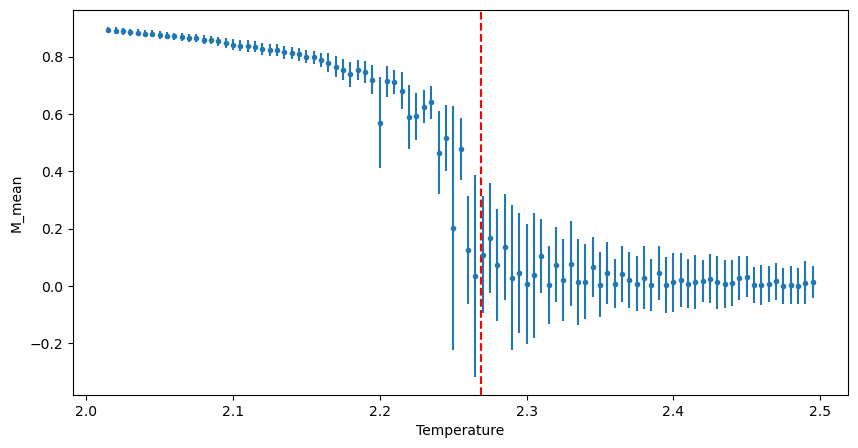

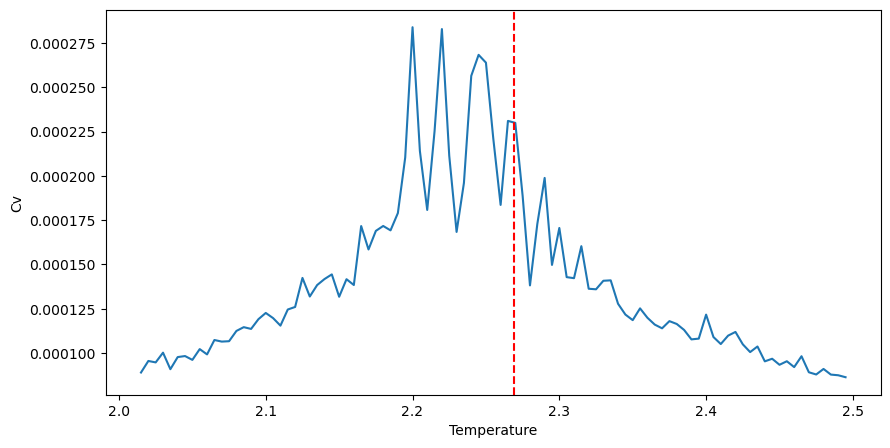

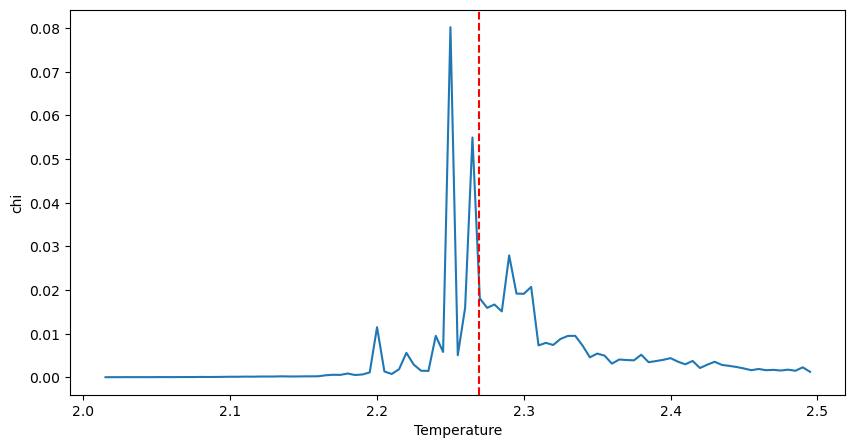

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Tc = 2/(np.log(1+np.sqrt(2)))

# filepath = 'Rumman data'
# filename = '0.00T5.00_EM_v5.csv'

# filepath = 'data'
# filename = '2.26T2.27_EM_v0.csv'

# filepath = 'data'
# filename = '2.00T2.50_EM_v3.csv'

# filepath = 'data'
# filename = '2.00T2.50_EM_v4.csv'

# filepath = 'data'
# filename = '2.26T2.28_EM_v0.csv'

# filepath = 'data'
# filename = '2.20T2.34_EM_v0.csv'

# filepath = 'data'
# filename = '2.00T2.50_EM_v5.csv'

# filepath = 'data'
# filename = '2.00T2.50_EM_v6.csv'

# filepath = 'data'
# filename = '2.25T2.29_EM_v0.csv'

# filepath = 'data'
# filename = '2.00T2.50_EM_v10.csv'

filepath = 'data'
filename = '2.00T2.50_EM_v12.csv'

file = filepath + '/' + filename

# Read the CSV file, skipping the first two rows
data = pd.read_csv(file, skiprows=3)
# data = pd.read_csv('Rumman data/0.00T5.00_EM_v3.csv')

# Drop the first two rows
data = data.drop([0, 1, 2])

# Convert columns to numeric
data = data.apply(pd.to_numeric)

Temp = data['Temp']
E_mean = data['E_mean']
E_std = data['E_std']
M_mean = np.abs(data['M_mean'])
M_std = data['M_std']

# Plot E_mean vs Temp
plt.figure(figsize=(10, 5))
plt.errorbar(Temp, E_mean, yerr=E_std, fmt='.')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('E_mean')
# plt.title('E_mean vs Temp')

# Plot M_mean vs Temp
plt.figure(figsize=(10, 5))
plt.errorbar(Temp, M_mean, yerr=M_std, fmt='.')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('M_mean')
# plt.title('M_mean vs Temp')

# Calculate Cv
Cv = (E_std ** 2) / (Temp ** 2)

# Plot Cv vs Temp
plt.figure(figsize=(10, 5))
plt.plot(Temp, Cv, linestyle='-')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('Cv')
# plt.title('Specific Heat (Cv) vs Temp')

# Calculate chi
chi = (M_std ** 2) / Temp

# Plot chi vs Temp
plt.figure(figsize=(10, 5))
plt.plot(Temp, chi, linestyle='-')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('chi')
# plt.title('Magnetic Susceptibility (chi) vs Temp')

plt.show()

In [36]:
def powerLaw(t, greek, A):
    return A*np.power(np.abs(t),greek)

print(f'{Tc:.5f}')

Tlo = Temp[Temp < Tc]
Thi = Temp[Temp > Tc]

tlo = (Tlo - Tc)/Tc
thi = (Thi - Tc)/Tc

M_meanlo = M_mean[Temp < Tc]
M_meanhi = M_mean[Temp > Tc]

E_meanlo = E_mean[Temp < Tc]
E_meanhi = E_mean[Temp > Tc]

Cvlo = Cv[Temp < Tc]
Cvhi = Cv[Temp > Tc]

chilo = chi[Temp < Tc]
chihi = chi[Temp > Tc]

2.26919


In [37]:
Tmin = 2.00
Tmax = 2.50

Tmin1 = 2.17
Tmax1 = 2.37

# Tmin1 = Tc
# Tmax1 = Tc

tvals = np.linspace(Tmin, Tc, 1000)

params, pcov = curve_fit(powerLaw, tlo[Tmin <= Tlo][Tlo<=Tmin1], M_meanlo[Tmin <= Tlo][Tlo<=Tmin1])
print(params)

# plt.figure(figsize=(10, 5))
plt.errorbar(Tlo[Tmin <= Tlo], M_meanlo[Tmin < Tlo], yerr=M_std[Temp < Tc][Tmin <= Temp], fmt='.')

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('M_mean')
# plt.title('M_mean vs Temp')

[0.15053879 1.245773  ]


Text(0, 0.5, 'M_mean')

[-2.43934024e+00  2.35811336e-07]
[-1.38597107e+00  6.80864631e-05]


/var/folders/pk/x0bc9zsx42l2vtpz9sfr5q5h0000gn/T/ipykernel_60845/3319471508.py:2: RuntimeWarning: divide by zero encountered in power
  return A*np.power(np.abs(t),greek)


(0.0, 0.01)

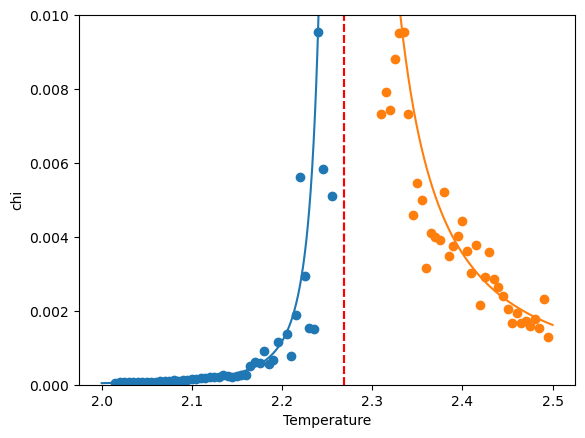

In [38]:
tvals = np.linspace(Tmin, Tc, 1000)

params, pcov = curve_fit(powerLaw, tlo[Tmin <= Tlo][Tlo <= Tmin1], chilo[Tmin <= Tlo][Tlo <= Tmin1])
print(params)

# plt.figure(figsize=(10, 5))
plt.scatter(Tlo[Tmin <= Tlo], chilo[Tmin < Tlo])

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('chi')
# plt.title('M_mean vs Temp')

tvals = np.linspace(Tc, Tmax, 1000)

params, pcov = curve_fit(powerLaw, thi[Thi <= Tmax][Tmax1 <= Thi], chihi[Thi <= Tmax][Tmax1 <= Thi])
print(params)

# plt.figure(figsize=(10, 5))
plt.scatter(Thi[Thi <= Tmax], chihi[Thi <= Tmax])

# Plotting the vertical line
plt.axvline(x=Tc, color='r', linestyle='--')

plt.plot(tvals, powerLaw((tvals-Tc)/Tc, *params))

plt.xlabel('Temperature')
plt.ylabel('chi')
# plt.title('M_mean vs Temp')

plt.ylim(0,0.01)